# Chap.03 신경망

In [1]:
import numpy as np
import matplotlib.pylab as plt

## 3.2 활성화 함수

### 계단 함수

In [2]:
def step_function_(x):
    if x > 0:
        return 1
    else:
        return 0

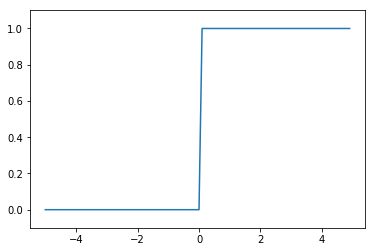

In [3]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

In [4]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [5]:
y = x > 0
y

array([False,  True,  True])

In [6]:
y = y.astype(np.int)
y

array([0, 1, 1])

### 시그모이드 함수

### $h(x)={1\over1+exp(-x)}$

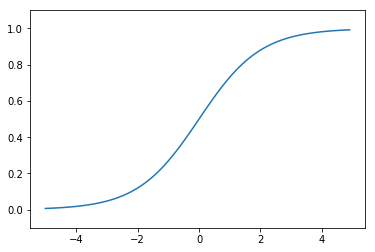

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

### 시그모이드 함수와 계단 함수 비교

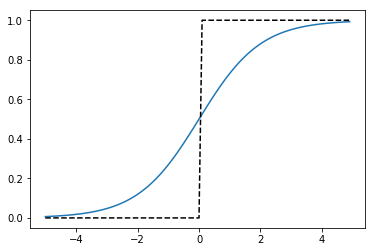

In [8]:
X = np.arange(-5.0, 5.0, 0.1)
Y_step = step_function(X)
Y_sigmoid = sigmoid(X)
plt.plot(X, Y_sigmoid,)
plt.plot(X, Y_step, 'k--')
plt.show()

#### 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화함

### ReLU 함수

### $h(x)=
\begin{cases}
0, & \left(x < 0\right) \\
x, & \left(x >= 0\right)
\end{cases}$

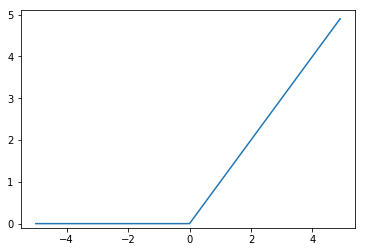

In [9]:
def relu(x):
    return np.maximum(0, x)

X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)
plt.plot(X, Y)
plt.ylim(-0.1, 5.1)
plt.show()

## 3.4 3층 신경망 구현하기

#### 3층 신경망을 아래의 그림에 나타내었다.<br/>입력층(0층)은 2개, 첫 번째 은닉층(1층)은 3개, 두 번째 은닉층(2층)은 2개, 출력층(3층)은 2개의 뉴런으로 구성된다.

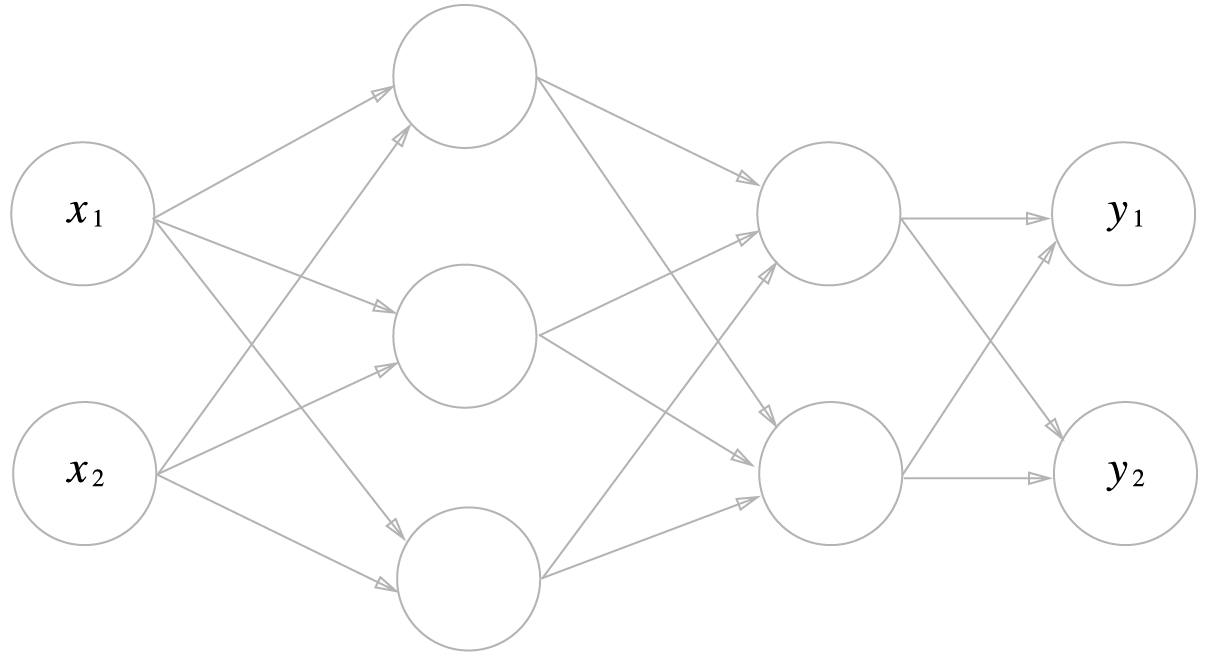

#### 중요한 표기

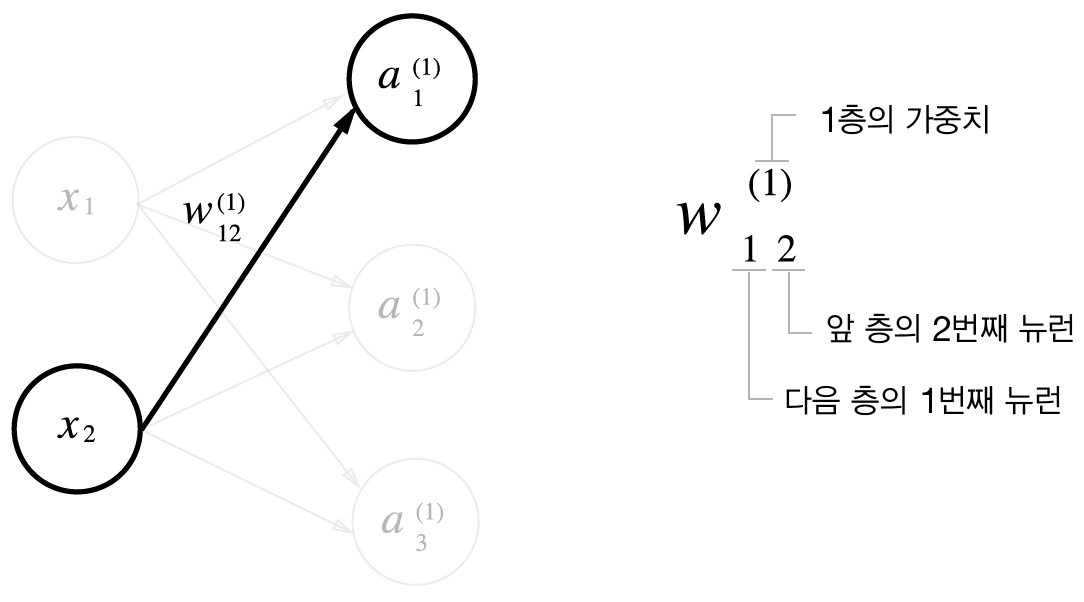

#### 입력층에서 1층으로 신호 전달

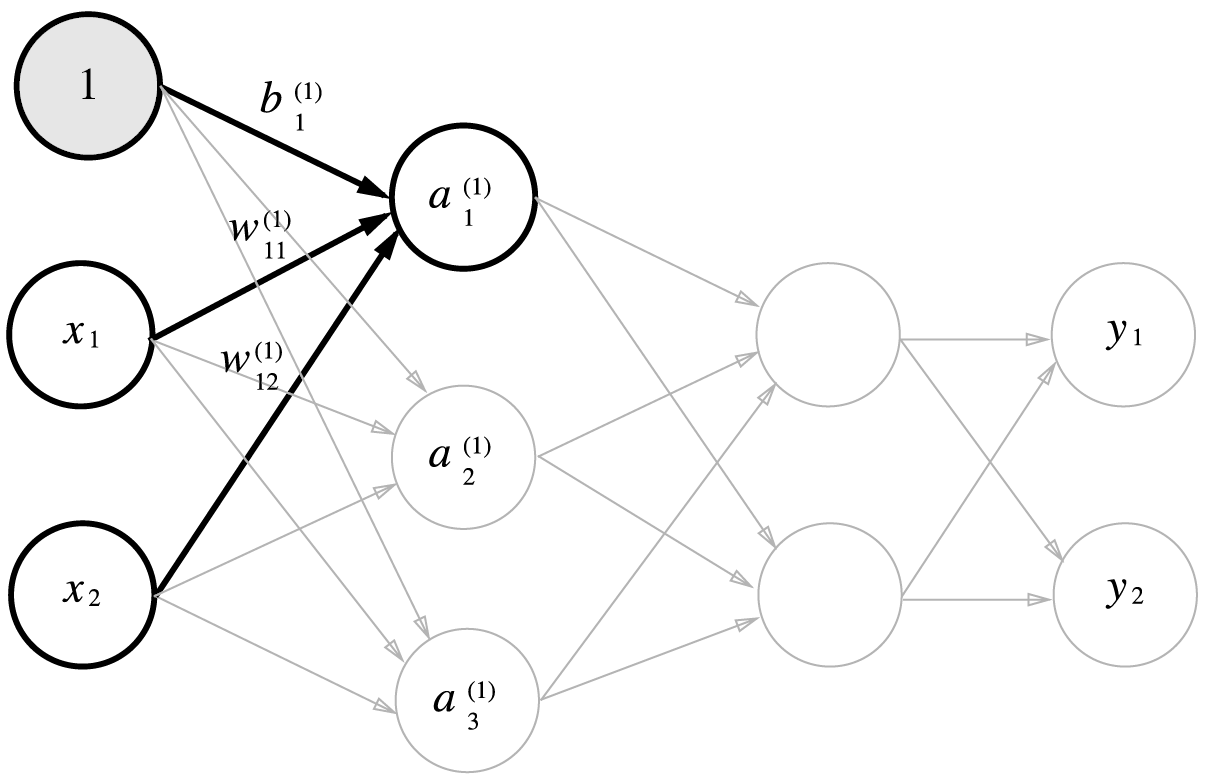

In [10]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

#### 활성화 함수(sigmoid function)를 거치면

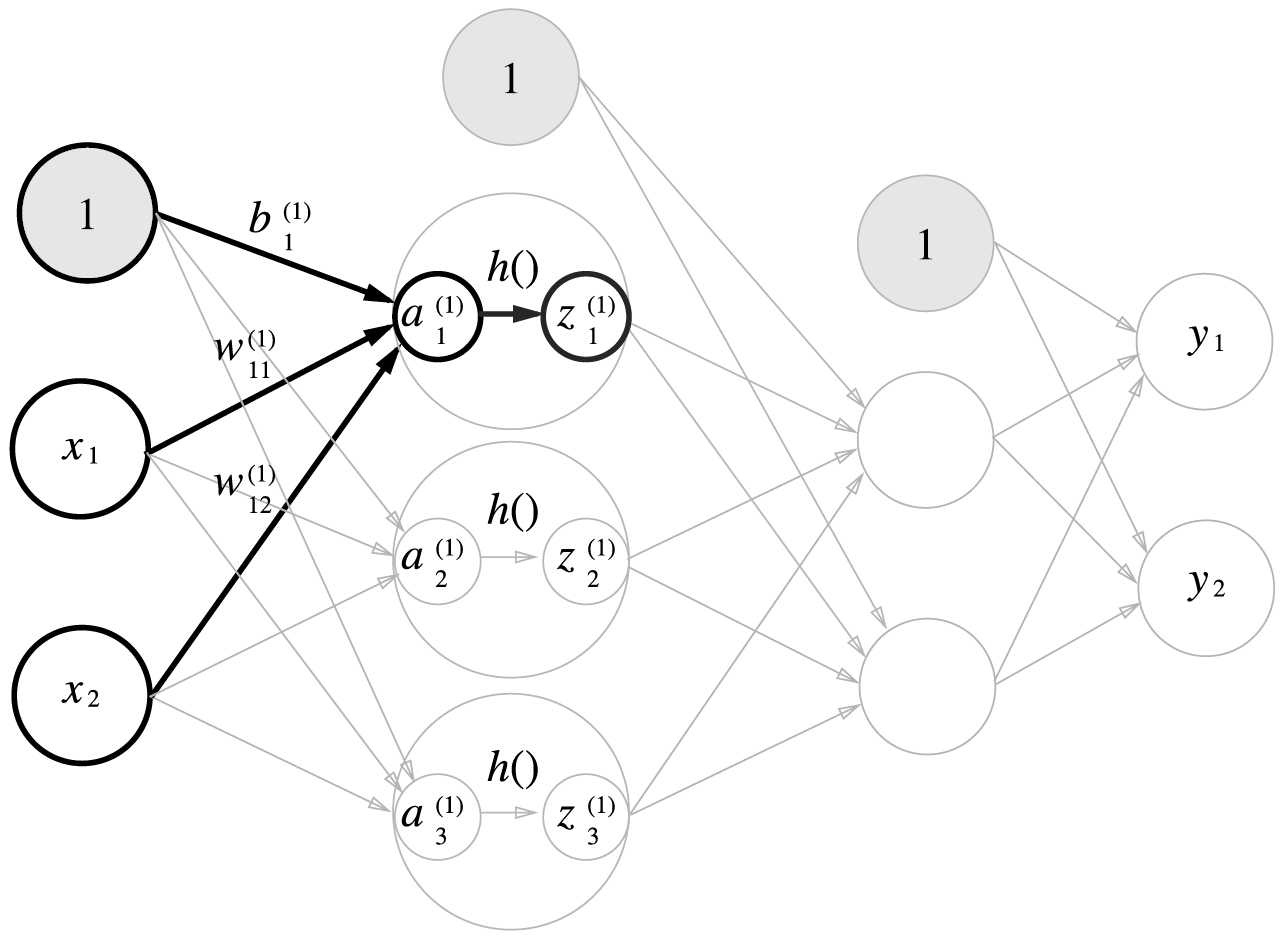

In [11]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

#### 1층에서 2층으로의 신호 전달 + 활성화 함수

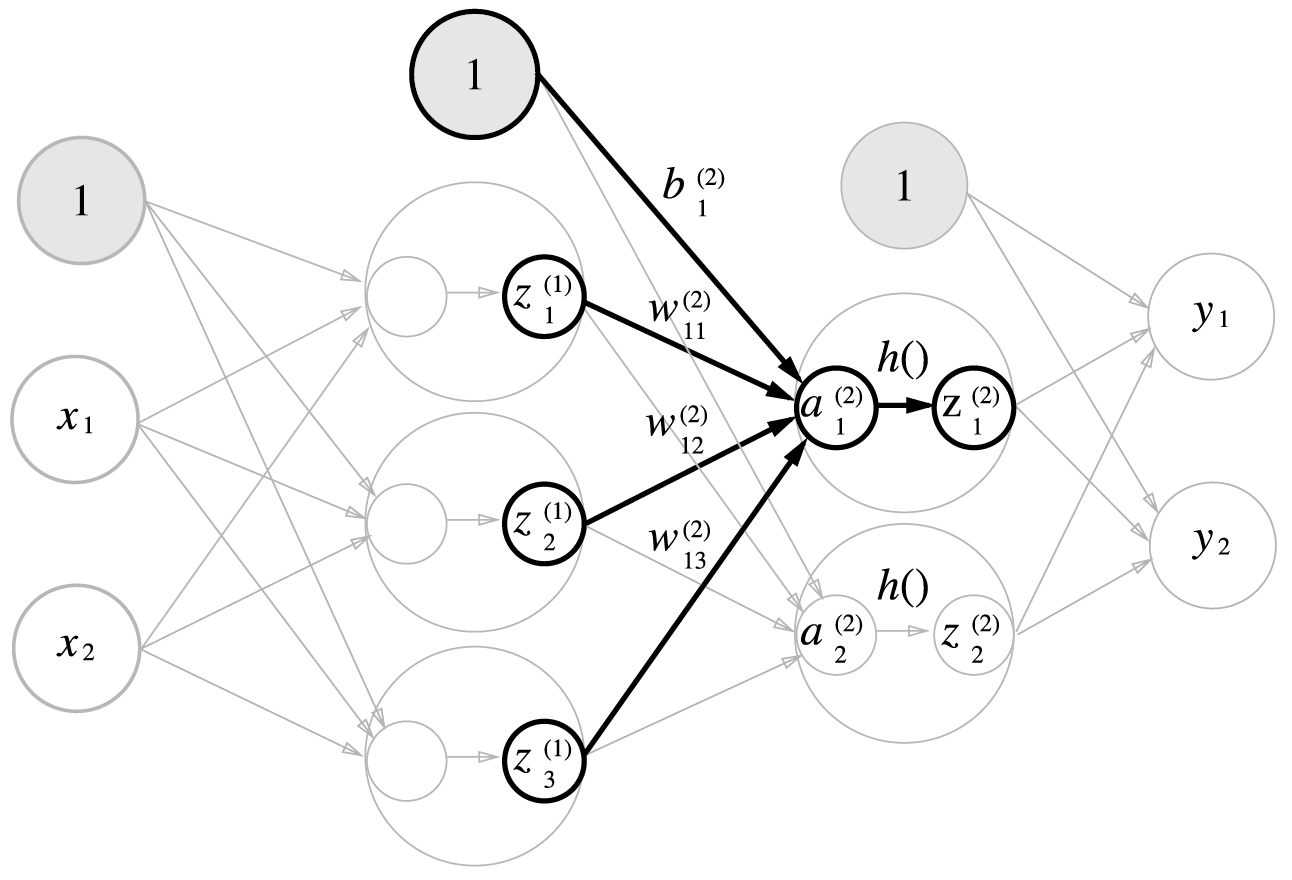

In [12]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
A2

array([0.51615984, 1.21402696])

In [13]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

#### 2층에서 출력층으로의 신호 전달 + 활성화 함수(identity function)

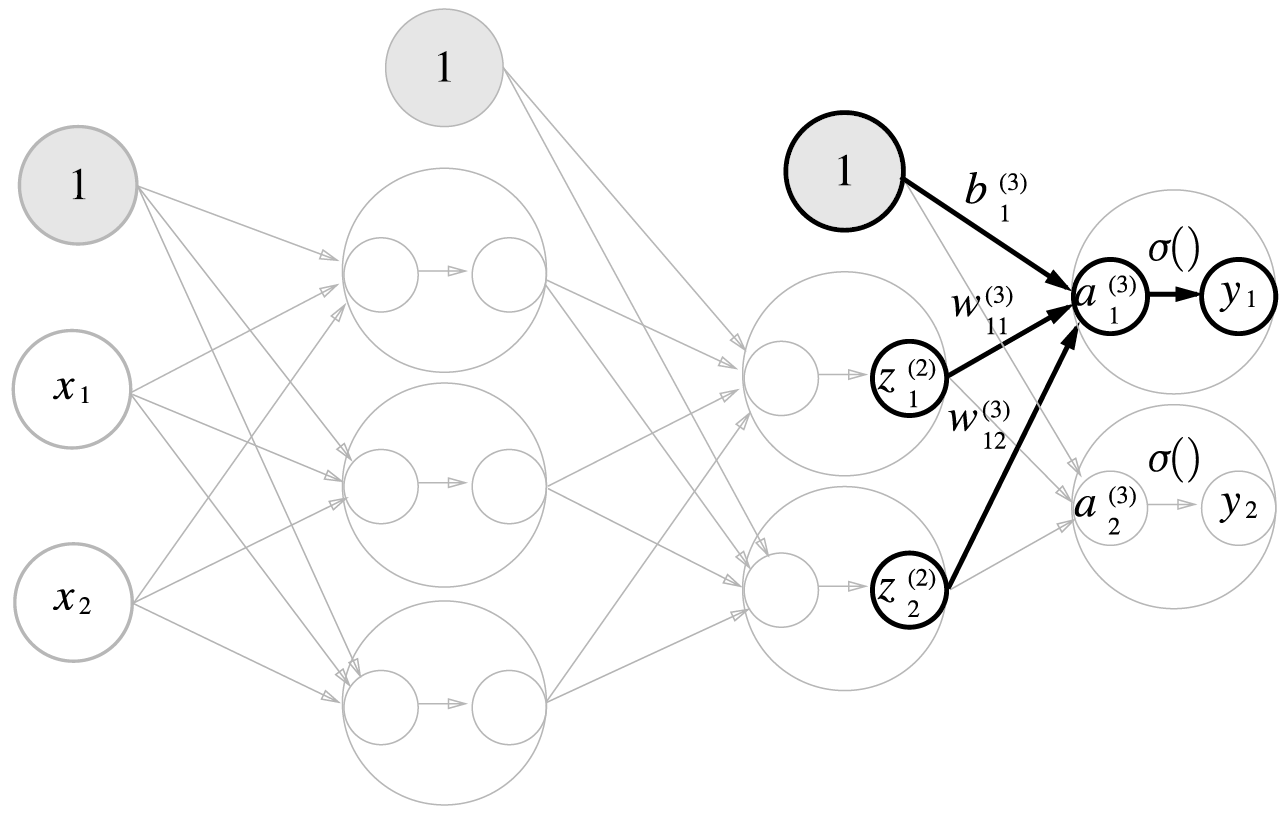

In [14]:
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [15]:
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

### 구현 정리

In [16]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
y

array([0.31682708, 0.69627909])

## 3.5 출력층 설계하기

#### 항등함수

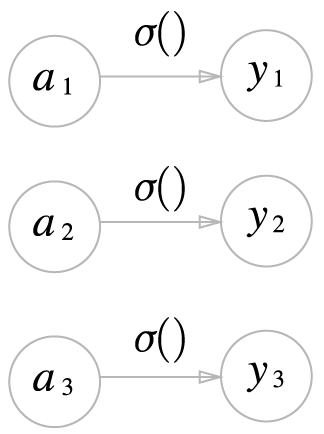

#### 소프트맥스 함수

## $y_k={exp\left(a_k\right)\over\sum_{i=1}^n exp\left(a_i\right)}$

#### $n$은 출력층 뉴런 수, $y_k$는 그중 $k$번째 출력

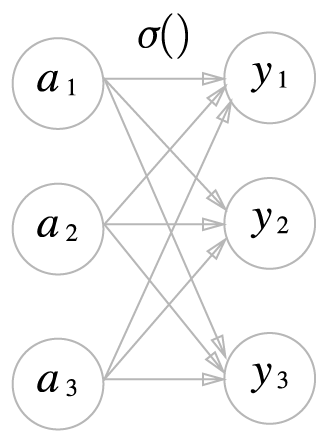

In [19]:
def softmax(a):
    """Overflow 방지를 위해 신호의 최댓값을 뺌"""
    return np.exp(a - np.max(a)) / np.sum(np.exp(a - np.max(a)))

a = np.array([1010, 1000, 990])
#a = np.array([10, 0, -10])
softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [18]:
np.sum(softmax(a)) # 출력의 총합은 1, 소프트맥스의 함수의 출력을 '확률'로 해석할 수 있다.

1.0

## 3.6 손글씨 숫자 인식

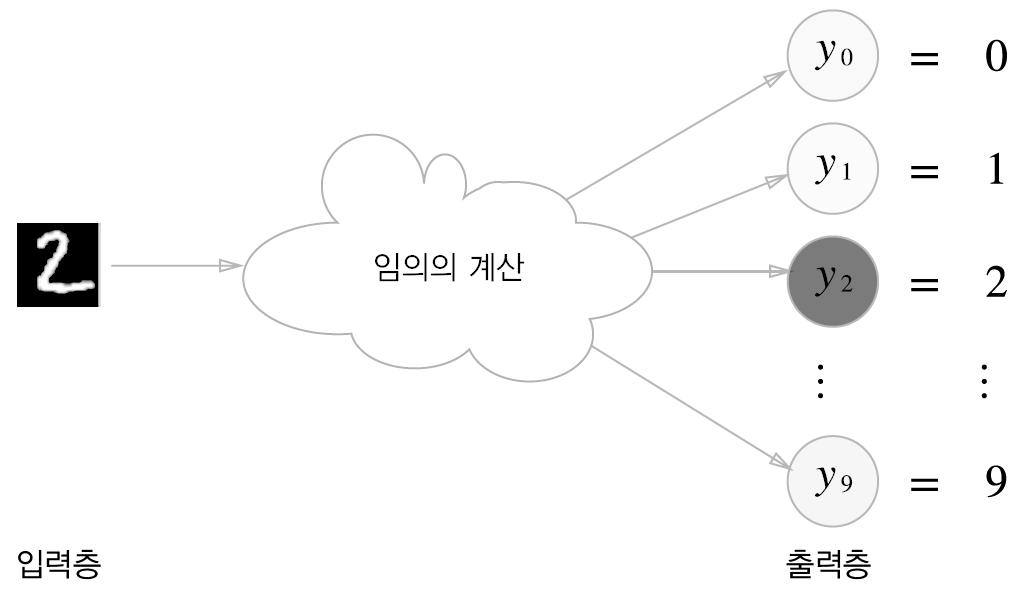

#### MNIST 데이터셋

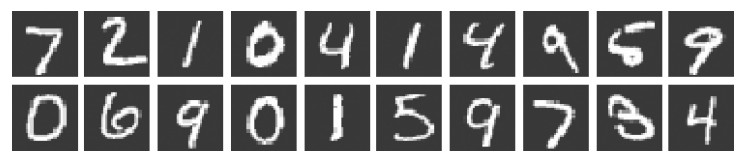

#### 신경망 각 층의 배열

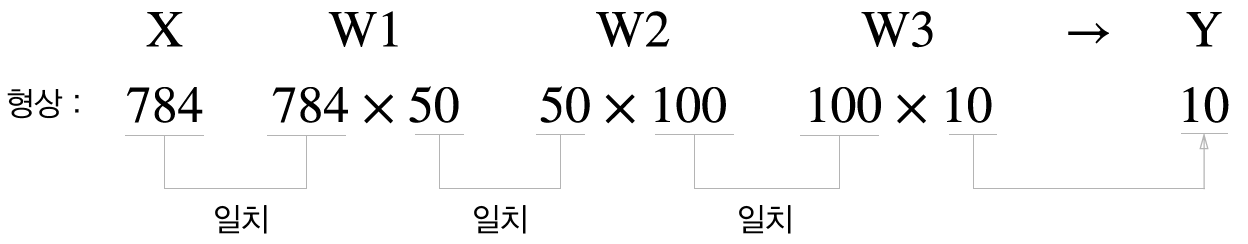

#### 배치

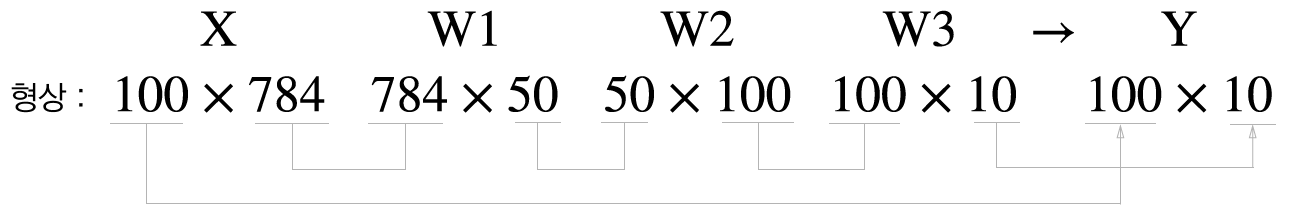